## EDA of Crime in Oakland CA July 2022-October 2022

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

In [2]:
# read the data 
df = pd.read_csv('~/Documents/DataSciProjects/Oakland_Crime/Oakland_Data_Clean.csv')
df.head(10)

,Unnamed: 0,CRIMETYPE,DATETIME,CASENUMBER,DESCRIPTION,POLICEBEAT,ADDRESS,CITY,STATE,Location,...,DATETIME_parsed,DAY_OF_WEEK,TIME_OF_DAY,YEAR,DATE,MM_YEAR,MONTH,MONTH_YEAR,LONG,LAT
0,0,VANDALISM,07/09/2022 02:54:00 AM,22-031310,TAMPER WITH VEHICLE,26X,1000 47TH AV,Oakland,CA,POINT (-122.213999 37.768346),...,2022-07-09 02:54:00,Saturday,2,2022,2022-07-09,07-2022,July,July 2022,-122.213999,37.768346
1,2,HOMICIDE,07/12/2022 11:30:00 AM,22-031818,SC UNEXPLAINED DEATH,33X,9300 F ST,Oakland,CA,POINT (-122.179946 37.744408),...,2022-07-12 11:30:00,Tuesday,11,2022,2022-07-12,07-2022,July,July 2022,-122.179946,37.744408
2,3,ROBBERY,07/17/2022 05:03:00 PM,22-032624,ROBBERY-FIREARM,15X,1800 PARK BLVD,Oakland,CA,POINT (-122.25096 37.799143),...,2022-07-17 17:03:00,Sunday,17,2022,2022-07-17,07-2022,July,July 2022,-122.250960,37.799143
3,4,PETTY THEFT,07/19/2022 02:30:00 PM,22-033016,THEFT,09X,5100 BROADWAY,Oakland,CA,POINT (-122.251678 37.835394),...,2022-07-19 14:30:00,Tuesday,14,2022,2022-07-19,07-2022,July,July 2022,-122.251678,37.835394
4,9,PETTY THEFT,07/28/2022 05:00:00 PM,22-034490,PETTY THEFT:$50-,06X,3200 MARKET ST,Oakland,CA,POINT (-122.275989 37.822389),...,2022-07-28 17:00:00,Thursday,17,2022,2022-07-28,07-2022,July,July 2022,-122.275989,37.822389
5,12,PETTY THEFT,08/05/2022 03:15:00 AM,22-035617,THEFT,13X,5700 BROADWAY,Oakland,CA,POINT (-122.246956 37.843139),...,2022-08-05 03:15:00,Friday,3,2022,2022-08-05,08-2022,August,August 2022,-122.246956,37.843139
6,16,GRAND THEFT,08/19/2022 10:30:00 AM,22-037828,THEFT,34X,8400 INTERNATIONAL BLVD,Oakland,CA,POINT (-122.17775 37.754272),...,2022-08-19 10:30:00,Friday,10,2022,2022-08-19,08-2022,August,August 2022,-122.177750,37.754272
7,17,DOMESTIC VIOLENCE,08/19/2022 09:41:00 PM,22-037926,THEFT,26Y,800 69TH AV,Oakland,CA,POINT (-122.198254 37.755532),...,2022-08-19 21:41:00,Friday,21,2022,2022-08-19,08-2022,August,August 2022,-122.198254,37.755532
8,18,FORCIBLE RAPE,08/21/2022 06:55:00 PM,22-038239,THEFT,24X,2000 35TH AV,Oakland,CA,POINT (-122.217828 37.783411),...,2022-08-21 18:55:00,Sunday,18,2022,2022-08-21,08-2022,August,August 2022,-122.217828,37.783411
9,19,TOWED VEHICLE,08/23/2022 10:32:00 AM,22-038331,VEHICLE THEFT - AUTO,07X,2500 WOOD ST,Oakland,CA,POINT (-122.29162 37.821045),...,2022-08-23 10:32:00,Tuesday,10,2022,2022-08-23,08-2022,August,August 2022,-122.291620,37.821045


In [3]:
#Basic information

df.info()

#Describe the data

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9185 entries, 0 to 9184
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9185 non-null   int64  
 1   CRIMETYPE        9185 non-null   object 
 2   DATETIME         9185 non-null   object 
 3   CASENUMBER       9185 non-null   object 
 4   DESCRIPTION      9185 non-null   object 
 5   POLICEBEAT       9185 non-null   object 
 6   ADDRESS          9185 non-null   object 
 7   CITY             9185 non-null   object 
 8   STATE            9185 non-null   object 
 9   Location         9185 non-null   object 
 10  OFFENSES_CAT     9185 non-null   object 
 11  DATETIME_parsed  9184 non-null   object 
 12  DAY_OF_WEEK      9184 non-null   object 
 13  TIME_OF_DAY      9185 non-null   int64  
 14  YEAR             9185 non-null   int64  
 15  DATE             9184 non-null   object 
 16  MM_YEAR          9184 non-null   object 
 17  MONTH         

,Unnamed: 0,TIME_OF_DAY,YEAR,LONG,LAT
count,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000
mean,7010.209799,12.746979,2021.779858,-122.223286,37.787814
std,4025.882401,6.728981,21.098014,0.324277,0.037348
min,0.000000,0.000000,0.000000,-122.311374,37.723849
25%,3526.000000,8.000000,2022.000000,-122.263732,37.764173
50%,7011.000000,13.000000,2022.000000,-122.228376,37.791769
75%,10507.000000,18.000000,2022.000000,-122.194819,37.809867
max,13940.000000,23.000000,2022.000000,-91.384210,39.942900


### Overview of Crime 

In [4]:
# percetage of particular in a particular month 
crimetype_month_year = pd.crosstab(index=df["CRIMETYPE"], columns=df["MONTH_YEAR"], normalize = "columns")*100
crimetype_month_year

MONTH_YEAR,August 2022,July 2022,October 2022,September 2022
CRIMETYPE,,,,
ARSON,0.539811,0.160600,0.000000,0.427350
BRANDISHING,0.000000,0.160600,0.000000,0.427350
BURG - AUTO,10.368871,13.918630,0.000000,4.059829
BURG - COMMERCIAL,3.328835,3.881156,1.515152,1.495726
BURG - OTHER,0.089969,0.267666,0.000000,0.747863
BURG - RESIDENTIAL,1.979307,1.472163,4.545455,1.602564
CHILD ABUSE,0.202429,0.107066,0.000000,0.000000
CURFEW & LOITERING,0.314890,0.160600,1.515152,0.427350
DISORDERLY CONDUCT,0.944669,1.070664,1.515152,0.854701


Stolen Vehicals, Burglaries- Auto, and Vandalism consistently encompass some the largest percentage of crimes across all 4 months.

[Text(0.5, 1.0, 'Crime Occurance by Month')]

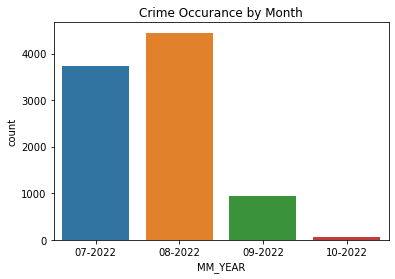

In [5]:
#crime by month
sns.countplot(x=df["MM_YEAR"]).set(title="Crime Occurance by Month")

**Note**: Here we see that crime peaked in August and fell in September, however, the steep decline in october is due to only having data for 2 weeks in October (when the data was pulled).

### August 2022- October 2022 Crime in Oakland by Crime Category 

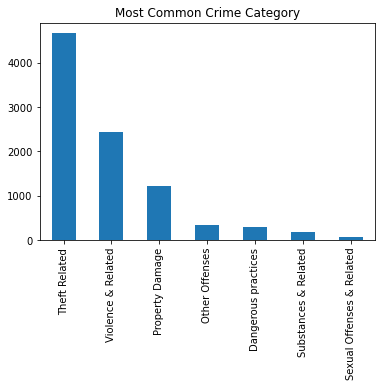

In [6]:
#count of crime by category 
df['OFFENSES_CAT'].value_counts().plot(kind='bar', title='Most Common Crime Category')
plt.xticks(rotation=90)
plt.show()

In [7]:
# percetage of offenses by categroy in a particular month 
crime_month_year = pd.crosstab(index=df["OFFENSES_CAT"], columns=df["MM_YEAR"], normalize = "columns")*100
crime_month_year

MM_YEAR,07-2022,08-2022,09-2022,10-2022
OFFENSES_CAT,,,,
Dangerous practices,2.730193,3.351327,3.952991,1.515152
Other Offenses,3.613490,3.441296,5.021368,7.575758
Property Damage,16.193790,12.618084,4.487179,1.515152
Sexual Offenses & Related,0.829764,0.539811,1.068376,0.000000
Substances & Related,1.472163,1.934323,3.525641,9.090909
Theft Related,52.355460,52.159244,39.209402,43.939394
Violence & Related,22.805139,25.955915,42.735043,36.363636


August 2022- October 2022 Crime in Oakland Heatmap - By Crime Category 

<AxesSubplot:xlabel='MM_YEAR', ylabel='OFFENSES_CAT'>

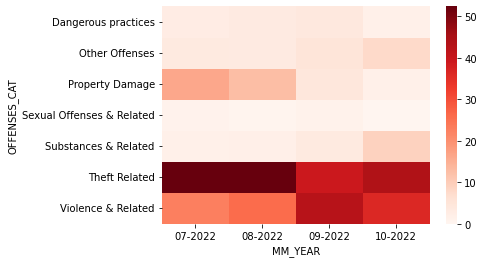

In [8]:
#visualize contingency map
sns.heatmap(crime_month_year, cmap='Reds')

Theft related crime are the primary types of crime to occur in August and July in 2022, but violence related crimes in Septmeber and October of 2022 were almost equal to theft related crimes.

### Crime by Time of Day (24-hour)

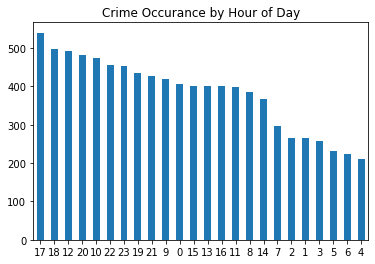

In [9]:
df['TIME_OF_DAY'].value_counts().plot(kind='bar', title='Crime Occurance by Hour of Day')
plt.xticks(rotation=0)
plt.show()

Hour, 17 or 5pm, has the highest number of crime occurance. 

What kind of crimes are occuring during 5pm?

In [10]:
# percetage of offenses by categroy by hour 
timeofday_crime = pd.crosstab(index=df["TIME_OF_DAY"], columns=df["OFFENSES_CAT"], normalize = "index")*100
timeofday_crime

OFFENSES_CAT,Dangerous practices,Other Offenses,Property Damage,Sexual Offenses & Related,Substances & Related,Theft Related,Violence & Related
TIME_OF_DAY,,,,,,,
0,1.228501,4.668305,14.004914,0.245700,0.737101,48.894349,30.221130
1,0.754717,4.150943,13.584906,0.754717,0.754717,44.150943,35.849057
2,2.631579,2.631579,19.548872,0.375940,2.255639,43.609023,28.947368
3,1.167315,3.112840,14.785992,0.000000,0.778210,52.140078,28.015564
4,1.904762,1.904762,18.571429,0.000000,2.857143,50.476190,24.285714
5,2.164502,4.761905,17.316017,1.731602,0.865801,42.857143,30.303030
6,1.785714,4.464286,15.178571,6.696429,0.000000,52.232143,19.642857
7,3.030303,5.723906,12.457912,1.010101,4.377104,57.912458,15.488215
8,2.597403,5.974026,13.506494,1.038961,1.298701,56.363636,19.220779


Theft related (46.1%) and violence related (34.4%) crimes are the highest percentage of crimes occuring during 5pm. This could be becasue it is around the time people get off of work and are communting back to their respective places.

<AxesSubplot:xlabel='OFFENSES_CAT', ylabel='TIME_OF_DAY'>

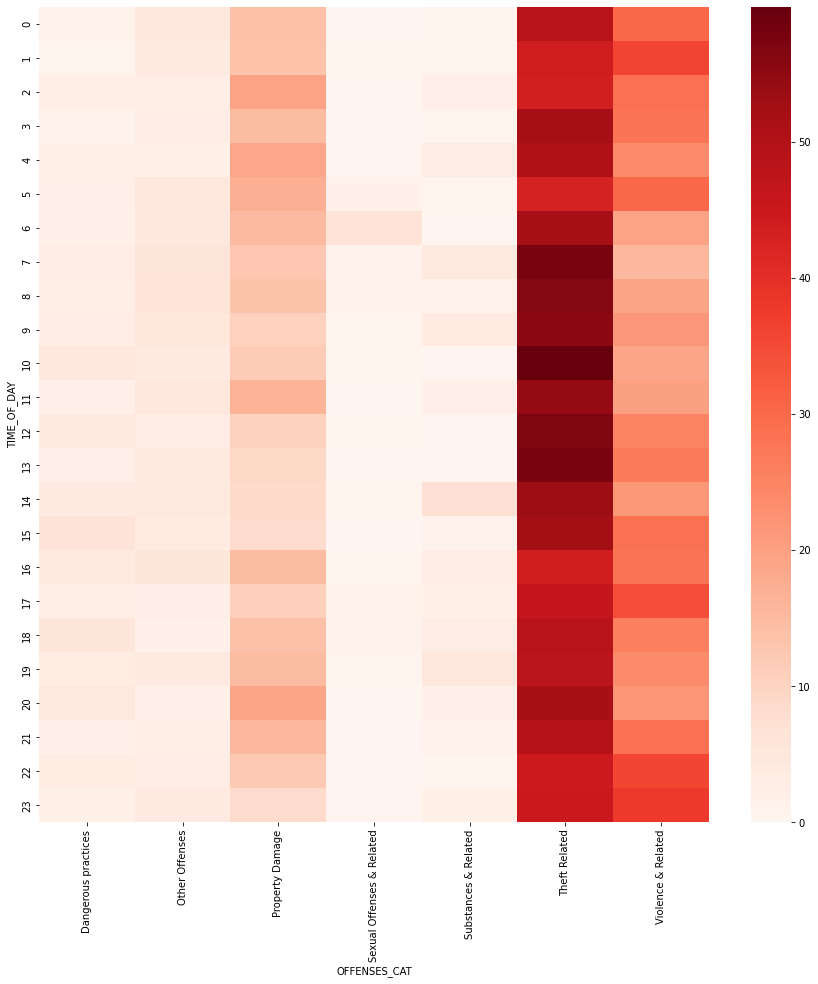

In [11]:
#visualize contingency map
plt.subplots(figsize=(15,15))
sns.heatmap(timeofday_crime, cmap='Reds')

The heat map of our contingency table gives a clear view that theft related crimes are more prevalent in the early am to early afternoon, however, there is less violence related crime. While there is more overall crime happening at 5pm there is less theft and more violence related crimes. This could be because there are more people out on the streets that could encounter assult or other violence related crimes. However in the early parts of the morning there are less people to witness theft therefore it might be more likely to occur.

Do types of crimes occuring by time of day shift materially?

Conduct a test of independce: 
The H0 (Null Hypothesis): There is no relationship between variables.

The H1 (Alternative Hypothesis): There is a relationship between variables.

In [49]:
timeofday_crime_2 = pd.crosstab(index=df["TIME_OF_DAY"], columns=df["OFFENSES_CAT"])

p_ToD_OCAT = chi2_contingency(timeofday_crime_2)[:3]

print("The test for independence of Offenses Categories and Time of Day: (test statistic, p-value, df)", p_ToD_OCAT)

The test for independence of Offenses Categories and Time of Day: (test statistic, p-value, df) (607.4320240101308, 4.175514118142124e-60, 138)


The critical value for the chi-square test with a degree of freedom of 138 and alpha 0.05 is 111.857. Since the test statistic (607.4) exceeds the critical value the null hypothesis is rejected. There is a relationship between the two varibles.

### Crime by Day of Week

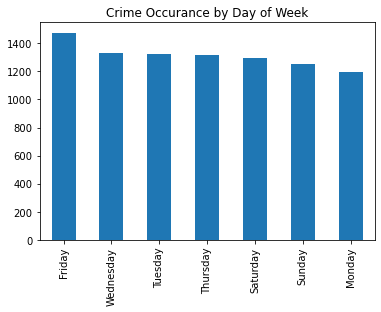

In [15]:
# count number of crimes by day 
df['DAY_OF_WEEK'].value_counts().plot(kind='bar', title='Crime Occurance by Day of Week')
plt.xticks(rotation=90)
plt.show()

In [22]:
# percetage of offenses by category by day of week 

dayofweek_crime = pd.crosstab(index=df["OFFENSES_CAT"], columns=df["DAY_OF_WEEK"], normalize = "columns")*100
dayofweek_crime

DAY_OF_WEEK,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
OFFENSES_CAT,,,,,,,
Dangerous practices,3.527815,2.343096,3.389831,2.637890,3.951368,2.947846,3.089676
Other Offenses,3.324288,3.263598,3.775039,3.756994,3.723404,3.552532,4.521477
Property Damage,14.993216,12.217573,13.713405,13.029576,13.601824,11.942555,12.358704
Sexual Offenses & Related,0.814111,0.083682,0.770416,0.479616,2.279635,0.302343,0.150716
Substances & Related,0.814111,1.924686,2.080123,3.756994,1.823708,2.116402,1.431801
Theft Related,53.052917,52.970711,47.149461,41.806555,52.583587,55.706727,52.147702
Violence & Related,23.473541,27.196653,29.121726,34.532374,22.036474,23.431595,26.299925


<AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='OFFENSES_CAT'>

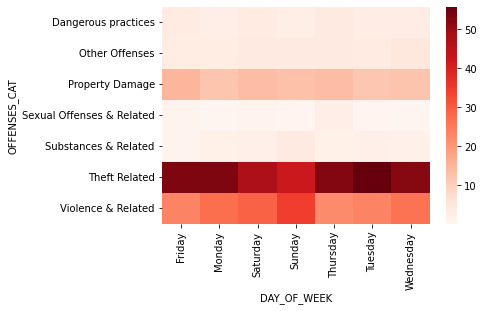

In [23]:
sns.heatmap(dayofweek_crime, cmap='Reds')

Do types of crimes occuring by day shift materially?

Conduct a test of independce: 
The H0 (Null Hypothesis): There is no relationship between variables.

The H1 (Alternative Hypothesis): There is a relationship between variables.

In [50]:
dayofweek_crime_2 = pd.crosstab(index=df["OFFENSES_CAT"], columns=df["DAY_OF_WEEK"])

p_DoW_OCAT = chi2_contingency(dayofweek_crime_2)[:3]

print("The test for independence of Offenses Categories and Day of Week:(test statistic, p-value, df)", p_DoW_OCAT)

The test for independence of Offenses Categories and Day of Week:(test statistic, p-value, df) (200.8800056933655, 8.715836427474656e-25, 36)


The critical value for the chi-square test with a degree of freedom of 36 and alpha 0.05 is 23.269. Since the test statistic (200.8) exceeds the critical value the null hypothesis is rejected. There is a relationship between the two varibles.

### Crime by Police Beat (AKA: geographical territories police are assigned to patrol at a given time)

In what areas are there crimes happening?

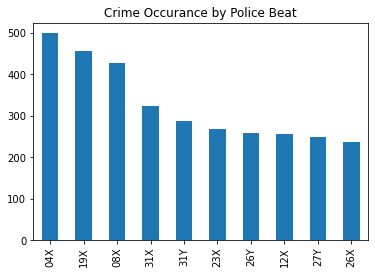

In [14]:
# Top 10 police beats with the most crime
df['POLICEBEAT'].value_counts().iloc[0:10].plot(kind='bar', title='Crime Occurance by Police Beat')

plt.xticks(rotation=90)

plt.show()

In [16]:
# to see where top 10 police beats are located 
# import image module
from IPython.display import Image
# get the image
Image(url="https://oaklandwiki.org/Oakland_Police_Department/_files/police_beats.jpg", width=700, height=800)


According to this the downtown Oakland areas (04x, 08x) and Fruitvale (19x) have more crimes happening.

What kinds of crimes are happening in these areas?

In [17]:
# percetage of offenses by categroy in a particular month 
policebeat_crime = pd.crosstab(index=df["POLICEBEAT"], columns=df["OFFENSES_CAT"], normalize = "index")*100
policebeat_crime

OFFENSES_CAT,Dangerous practices,Other Offenses,Property Damage,Sexual Offenses & Related,Substances & Related,Theft Related,Violence & Related
POLICEBEAT,,,,,,,
01X,0.000000,1.265823,18.565401,0.000000,0.000000,65.822785,14.345992
02X,3.636364,7.272727,8.181818,1.818182,0.000000,42.727273,36.363636
02Y,2.586207,6.034483,12.068966,0.862069,6.034483,41.379310,31.034483
03X,0.529101,2.645503,18.518519,1.587302,1.587302,53.968254,21.164021
03Y,1.379310,0.689655,25.517241,0.000000,0.689655,55.862069,15.862069
04X,2.605210,2.605210,20.240481,0.200401,1.002004,53.907816,19.438878
05X,6.410256,0.000000,14.102564,0.000000,0.000000,50.000000,29.487179
05Y,0.000000,3.703704,14.814815,1.851852,0.000000,46.296296,33.333333
06X,1.219512,3.048780,4.878049,0.000000,1.829268,45.121951,43.902439


In all of the areas thefts are more likely to occure and violence related crimes with 60% theft related crimes happening in 08x.

<AxesSubplot:xlabel='OFFENSES_CAT', ylabel='POLICEBEAT'>

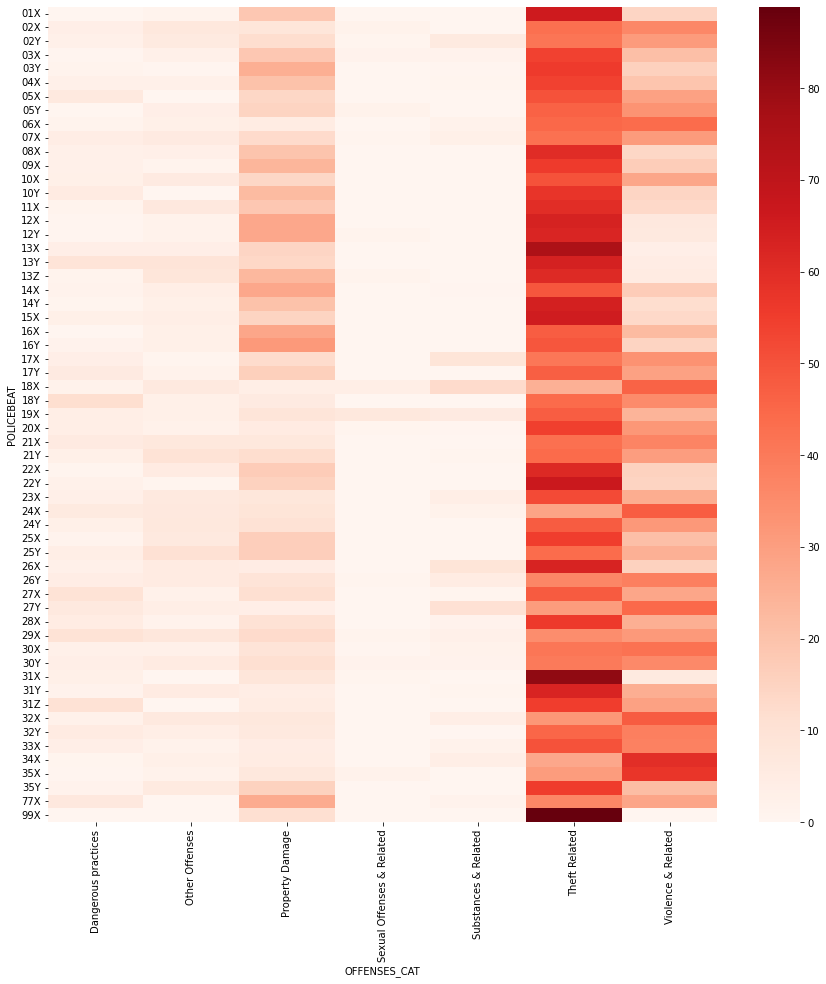

In [18]:
#visualize contingency map
plt.subplots(figsize=(15,15))
sns.heatmap(policebeat_crime, cmap='Reds')

In visualizing the contingency map we see that police beat 99x has higher theft related crimes that other areas. Since police beat 99x was not listed in the map above I isolated data where police beat = 99x in order to see that areas that corespond to that police beat. It looks like police beat 99x seems to be a misc or deafult lable for those data points where the police beat was not explicity input. 

In [19]:
# Isolating on data points with police beats = 99x
temp_df = df[(df['POLICEBEAT'] == '99X')]
temp_df

,Unnamed: 0,CRIMETYPE,DATETIME,CASENUMBER,DESCRIPTION,POLICEBEAT,ADDRESS,CITY,STATE,Location,...,DATETIME_parsed,DAY_OF_WEEK,TIME_OF_DAY,YEAR,DATE,MM_YEAR,MONTH,MONTH_YEAR,LONG,LAT
3136,4802,VANDALISM,07/19/2022 03:05:00 AM,22-915967,VANDALISM,99X,1000 63RD ST,Oakland,CA,POINT (-122.280262 37.846645),...,2022-07-19 03:05:00,Tuesday,3,2022,2022-07-19,07-2022,July,July 2022,-122.280262,37.846645
3215,4923,FORGERY & COUNTERFEITING,08/02/2022 01:07:00 AM,22-916917,THEFT BY USE OF ACCESS CARD,99X,2200 MARKET ST,Oakland,CA,POINT (-122.278782 37.814102),...,2022-08-02 01:07:00,Tuesday,1,2022,2022-08-02,08-2022,August,August 2022,-122.278782,37.814102
4466,6827,BURG - RESIDENTIAL,08/03/2022 04:50:00 PM,22-917208,BURGLARY-FORCIBLE ENTRY,99X,1300 CLAY ST,Oakland,CA,POINT (-122.273936 37.804767),...,2022-08-03 16:50:00,Wednesday,16,2022,2022-08-03,08-2022,August,August 2022,-122.273936,37.804767
4866,7457,FRAUD,08/02/2022 12:12:00 PM,22-035141,OBT CREDIT/ETC:OTHER'S ID,99X,2200 MARKET ST,Oakland,CA,POINT (-122.278782 37.814102),...,2022-08-02 12:12:00,Tuesday,12,2022,2022-08-02,08-2022,August,August 2022,-122.278782,37.814102
6331,9652,FORGERY & COUNTERFEITING,08/02/2022 04:25:00 PM,22-917035,THEFT BY USE OF ACCESS CARD,99X,3600 MANDELA PKWY,Oakland,CA,POINT (-122.289221 37.827326),...,2022-08-02 16:25:00,Tuesday,16,2022,2022-08-02,08-2022,August,August 2022,-122.289221,37.827326
7480,11383,FORGERY & COUNTERFEITING,08/01/2022 01:00:00 AM,22-916864,THEFT BY USE OF ACCESS CARD,99X,500 CASTRO ST,Oakland,CA,POINT (-122.280891 37.800642),...,2022-08-01 01:00:00,Monday,1,2022,2022-08-01,08-2022,August,August 2022,-122.280891,37.800642
8616,13097,FORGERY & COUNTERFEITING,08/17/2022 11:05:00 AM,22-918403,THEFT BY USE OF ACCESS CARD,99X,400 N EUCLID AV,Oakland,CA,POINT (-122.251502 37.810826),...,2022-08-17 11:05:00,Wednesday,11,2022,2022-08-17,08-2022,August,August 2022,-122.251502,37.810826
8918,13548,FORGERY & COUNTERFEITING,08/02/2022 01:08:00 AM,22-916959,THEFT BY USE OF ACCESS CARD,99X,2300 MARKET ST,Oakland,CA,POINT (-122.278353 37.815273),...,2022-08-02 01:08:00,Tuesday,1,2022,2022-08-02,08-2022,August,August 2022,-122.278353,37.815273
9076,13789,STOLEN VEHICLE,07/29/2022 11:00:00 AM,22-034494,VEHICLE THEFT - AUTO,99X,1000 ELMHURST AV,Oakland,CA,POINT (-122.178397 37.74293),...,2022-07-29 11:00:00,Friday,11,2022,2022-07-29,07-2022,July,July 2022,-122.178397,37.742930


In [20]:
# percetage of offenses in a police beat by month 
policebeat_crime_month = pd.crosstab(index=df["POLICEBEAT"], columns=df["MM_YEAR"], normalize = "index")*100
policebeat_crime_month

MM_YEAR,07-2022,08-2022,09-2022,10-2022
POLICEBEAT,,,,
01X,50.632911,44.725738,4.641350,0.000000
02X,38.181818,50.909091,10.000000,0.909091
02Y,32.758621,37.068966,30.172414,0.000000
03X,35.449735,53.968254,9.523810,1.058201
03Y,37.931034,53.103448,5.517241,3.448276
04X,43.887776,45.290581,10.821643,0.000000
05X,41.025641,48.717949,10.256410,0.000000
05Y,40.740741,51.851852,7.407407,0.000000
06X,32.317073,51.219512,14.024390,2.439024


<AxesSubplot:xlabel='MM_YEAR', ylabel='POLICEBEAT'>

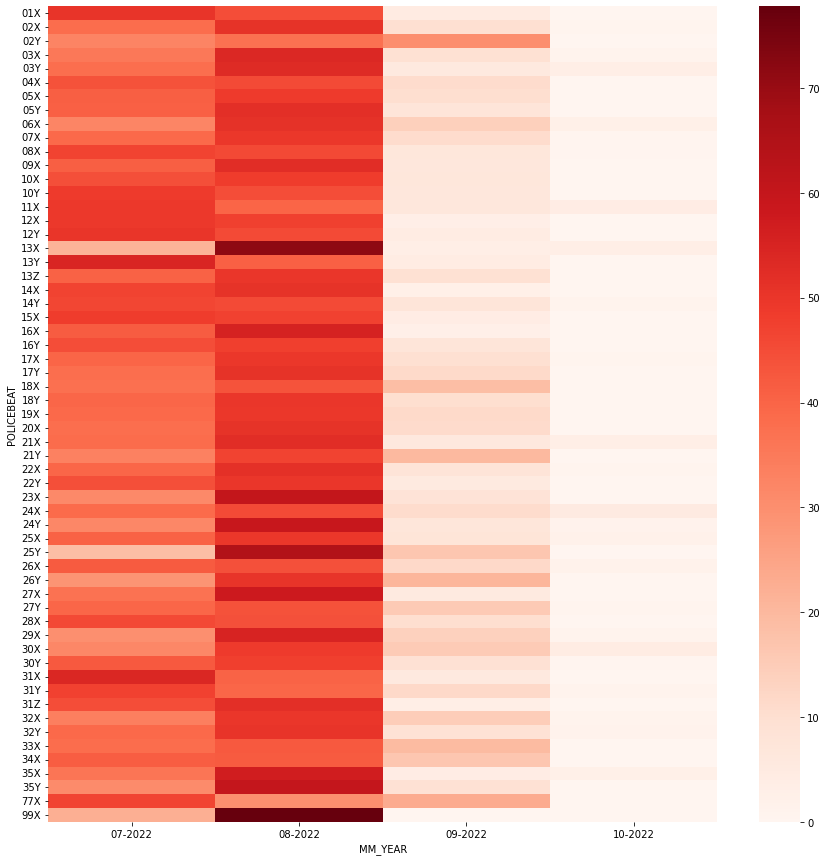

In [21]:
#visualize contingency map
plt.subplots(figsize=(15,15))
sns.heatmap(policebeat_crime_month, cmap='Reds')